# Heart Disease Prediction - Exploratory Data Analysis
## MLOps Assignment - Task 1

This notebook performs comprehensive EDA on the Heart Disease UCI dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

## 1. Data Loading

In [2]:
# Load dataset
df = pd.read_csv('../data/heart_disease_raw.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (303, 14)

First few rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,0.0,2.0,147.0,455.0,0.0,0.0,104.0,0.0,0.2,2.0,0.0,3.0,0
1,57.0,1.0,1.0,180.0,182.0,0.0,0.0,78.0,1.0,2.4,1.0,2.0,2.0,1
2,43.0,0.0,0.0,150.0,436.0,0.0,1.0,149.0,0.0,3.3,2.0,2.0,2.0,0
3,71.0,0.0,3.0,94.0,428.0,0.0,0.0,157.0,0.0,3.2,2.0,1.0,3.0,0
4,36.0,1.0,2.0,156.0,137.0,0.0,1.0,158.0,0.0,1.0,0.0,1.0,2.0,0


### Feature Descriptions

- **age**: Age in years
- **sex**: Sex (1 = male; 0 = female)
- **cp**: Chest pain type (0-3)
- **trestbps**: Resting blood pressure (mm Hg)
- **chol**: Serum cholesterol (mg/dl)
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg**: Resting ECG results (0-2)
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise
- **slope**: Slope of peak exercise ST segment (0-2)
- **ca**: Number of major vessels colored by fluoroscopy (0-3)
- **thal**: Thalassemia (0-3)
- **target**: Heart disease (1 = presence; 0 = absence)

## 2. Data Quality Assessment

In [3]:
# Dataset info
print("Dataset Information:")
print(df.info())

print("\n" + "="*50)
print("Basic Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       300 non-null    float64
 2   cp        298 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     298 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     295 non-null    float64
 11  ca        296 non-null    float64
 12  thal      293 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

Basic Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  300.000000  298.000000  294.000000  297.000000  294.000000   
mean    52.9

Missing Values Summary:
            Column  Missing_Count  Missing_Percentage
thal          thal             10                3.30
fbs            fbs              9                2.97
restecg    restecg              9                2.97
trestbps  trestbps              9                2.97
slope        slope              8                2.64
ca              ca              7                2.31
thalach    thalach              6                1.98
chol          chol              6                1.98
age            age              6                1.98
cp              cp              5                1.65
exang        exang              5                1.65
sex            sex              3                0.99
oldpeak    oldpeak              1                0.33


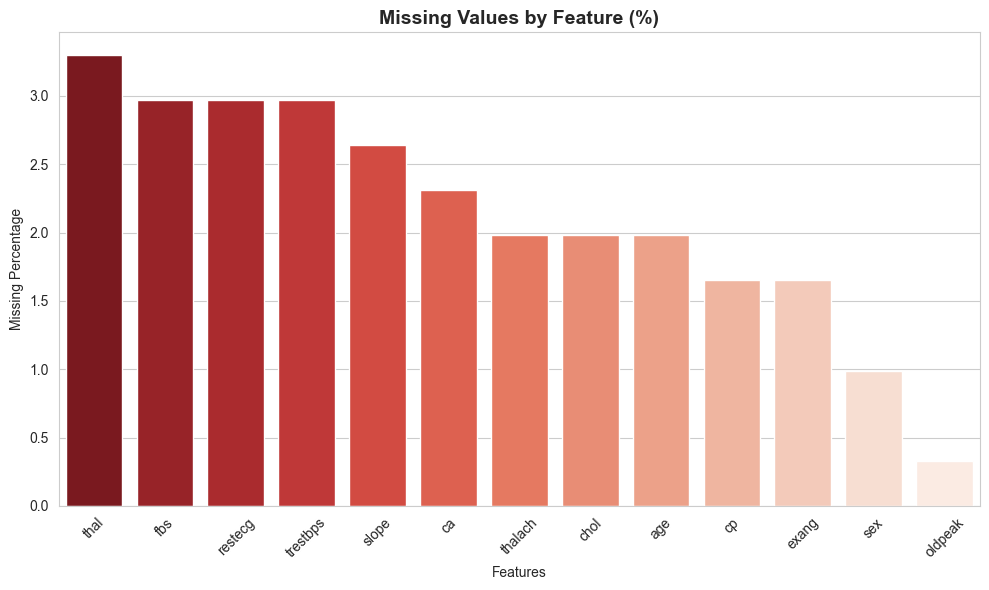

In [4]:
# Missing values analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
print(missing_data[missing_data['Missing_Count'] > 0])

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_cols = missing_data[missing_data['Missing_Count'] > 0]
if len(missing_cols) > 0:
    sns.barplot(data=missing_cols, x='Column', y='Missing_Percentage', palette='Reds_r')
    plt.title('Missing Values by Feature (%)', fontsize=14, fontweight='bold')
    plt.ylabel('Missing Percentage')
    plt.xlabel('Features')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../screenshots/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No missing values found!")

## 3. Target Variable Analysis

Target Distribution:
target
0    198
1    105
Name: count, dtype: int64

Class Balance: 0.53


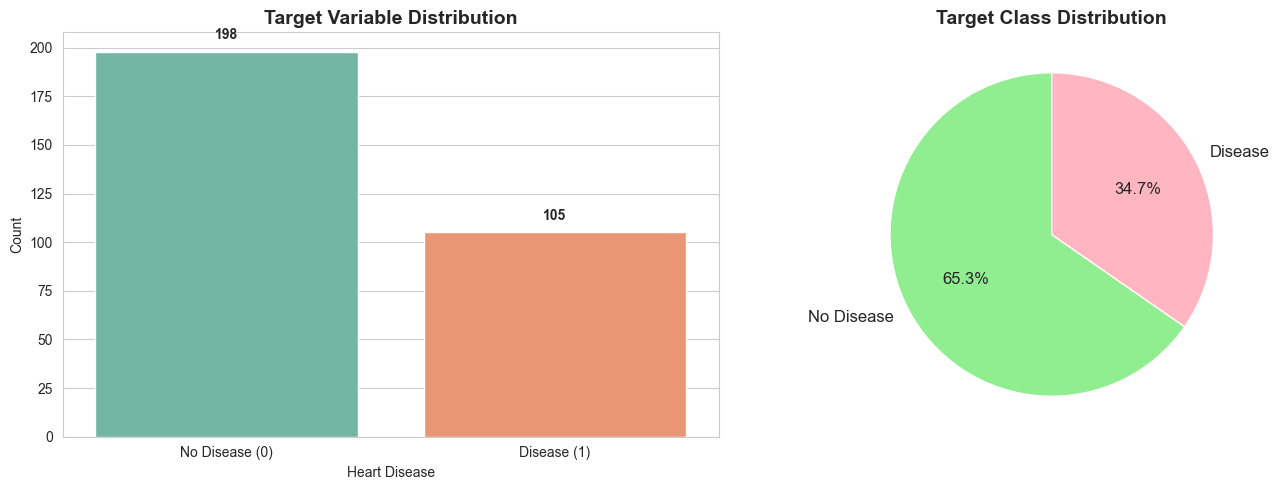

In [5]:
# Target distribution
target_counts = df['target'].value_counts()
print("Target Distribution:")
print(target_counts)
print(f"\nClass Balance: {target_counts[1]/target_counts[0]:.2f}")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='target', palette='Set2', ax=axes[0])
axes[0].set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Heart Disease')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Disease (0)', 'Disease (1)'])

# Add counts on bars
for i, count in enumerate(target_counts):
    axes[0].text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#90EE90', '#FFB6C1']
axes[1].pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Target Class Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../screenshots/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Numerical Features Analysis

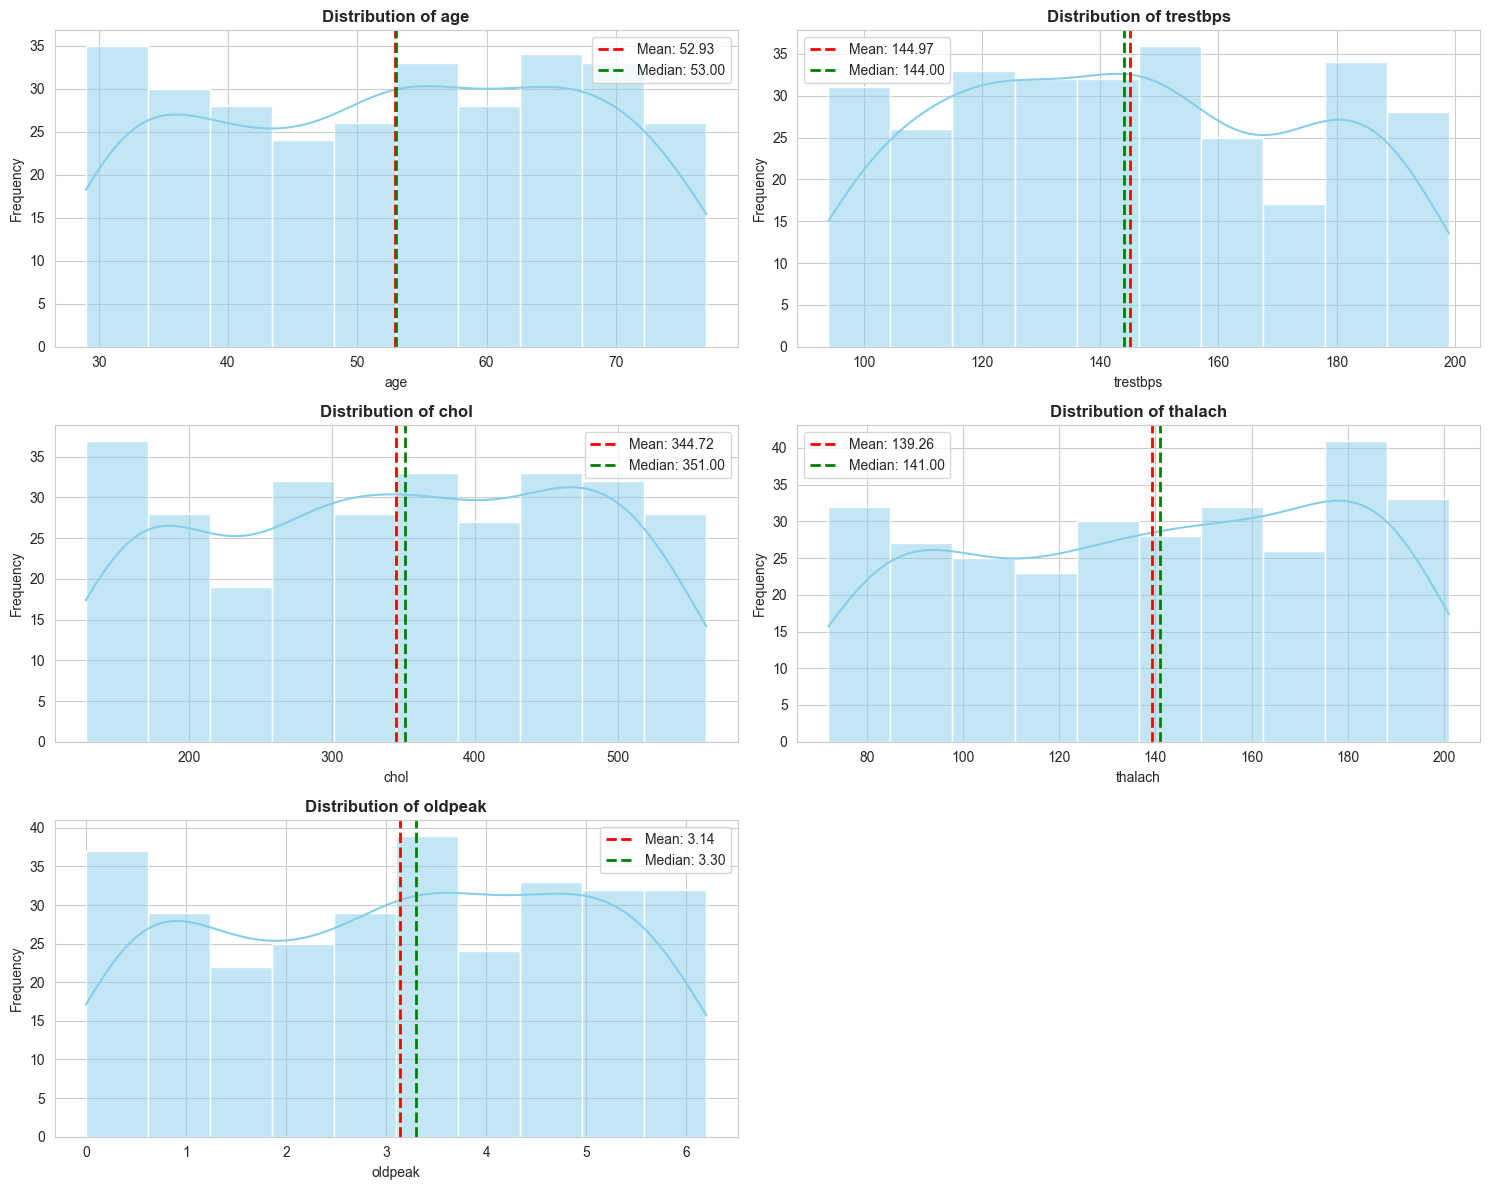

In [6]:
# Select numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Distribution of numerical features
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    
    # Add statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

# Remove extra subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('../screenshots/numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

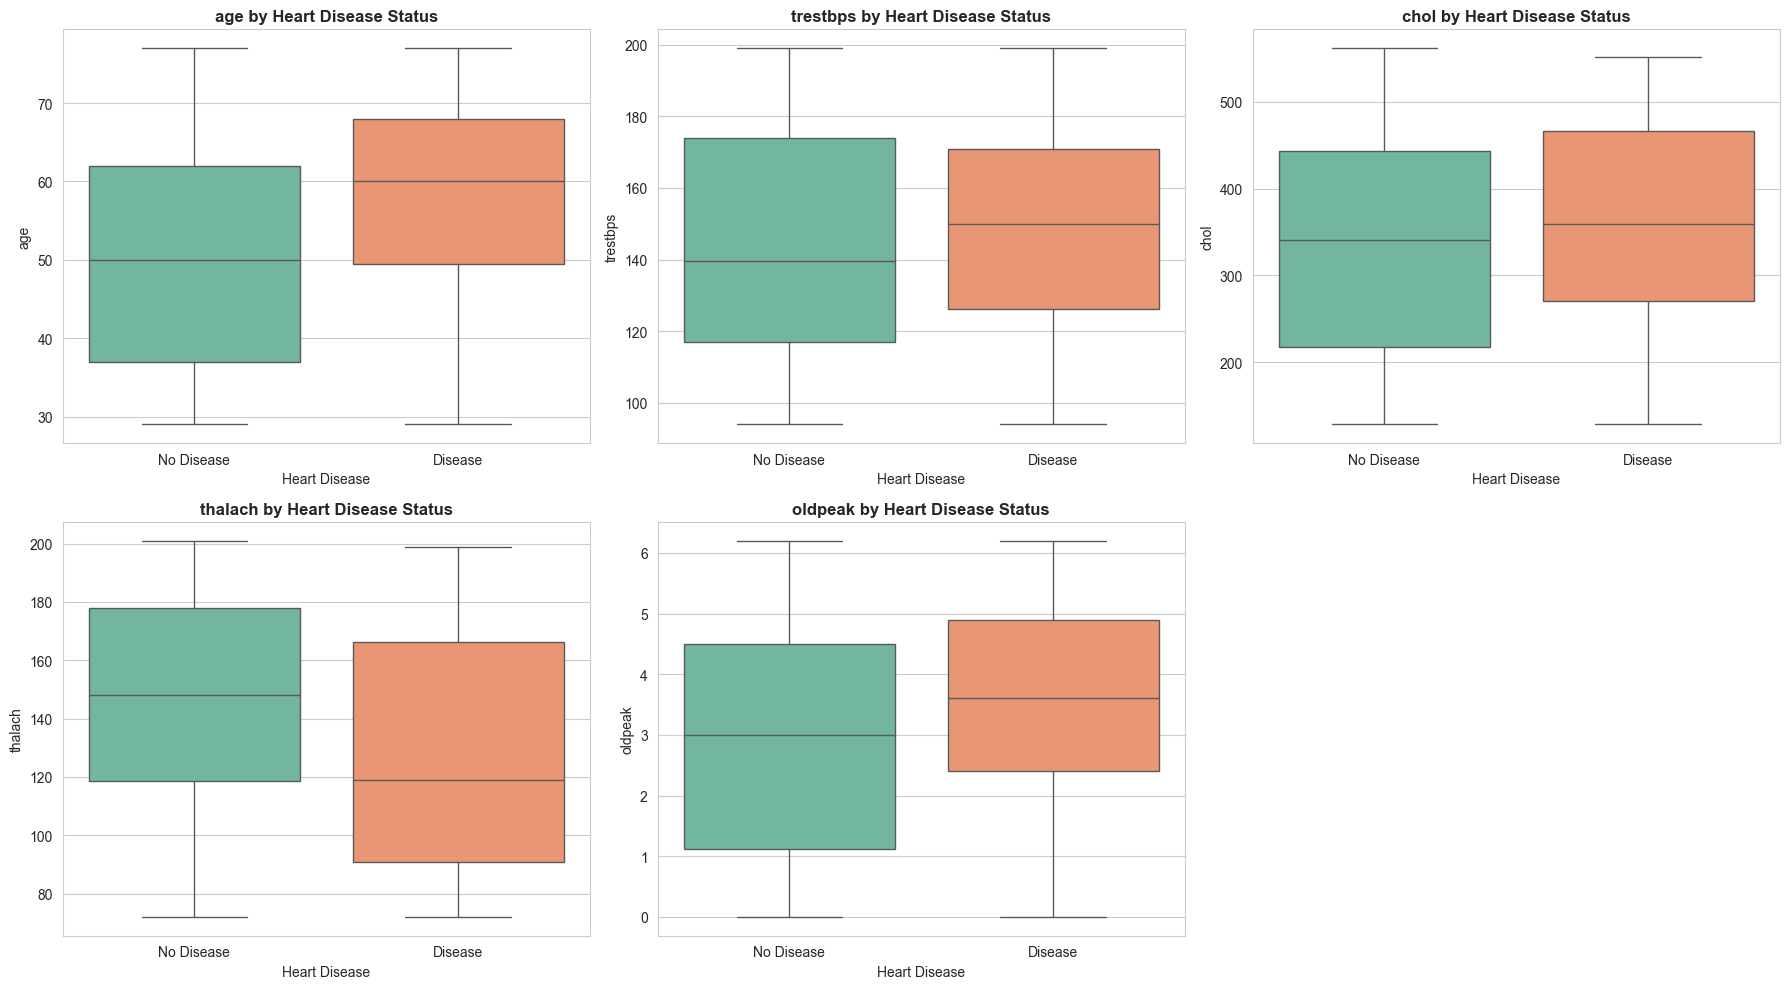

In [7]:
# Box plots by target
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    sns.boxplot(data=df, x='target', y=col, palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'{col} by Heart Disease Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Heart Disease')
    axes[idx].set_xticklabels(['No Disease', 'Disease'])

# Remove extra subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('../screenshots/boxplots_by_target.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Categorical Features Analysis

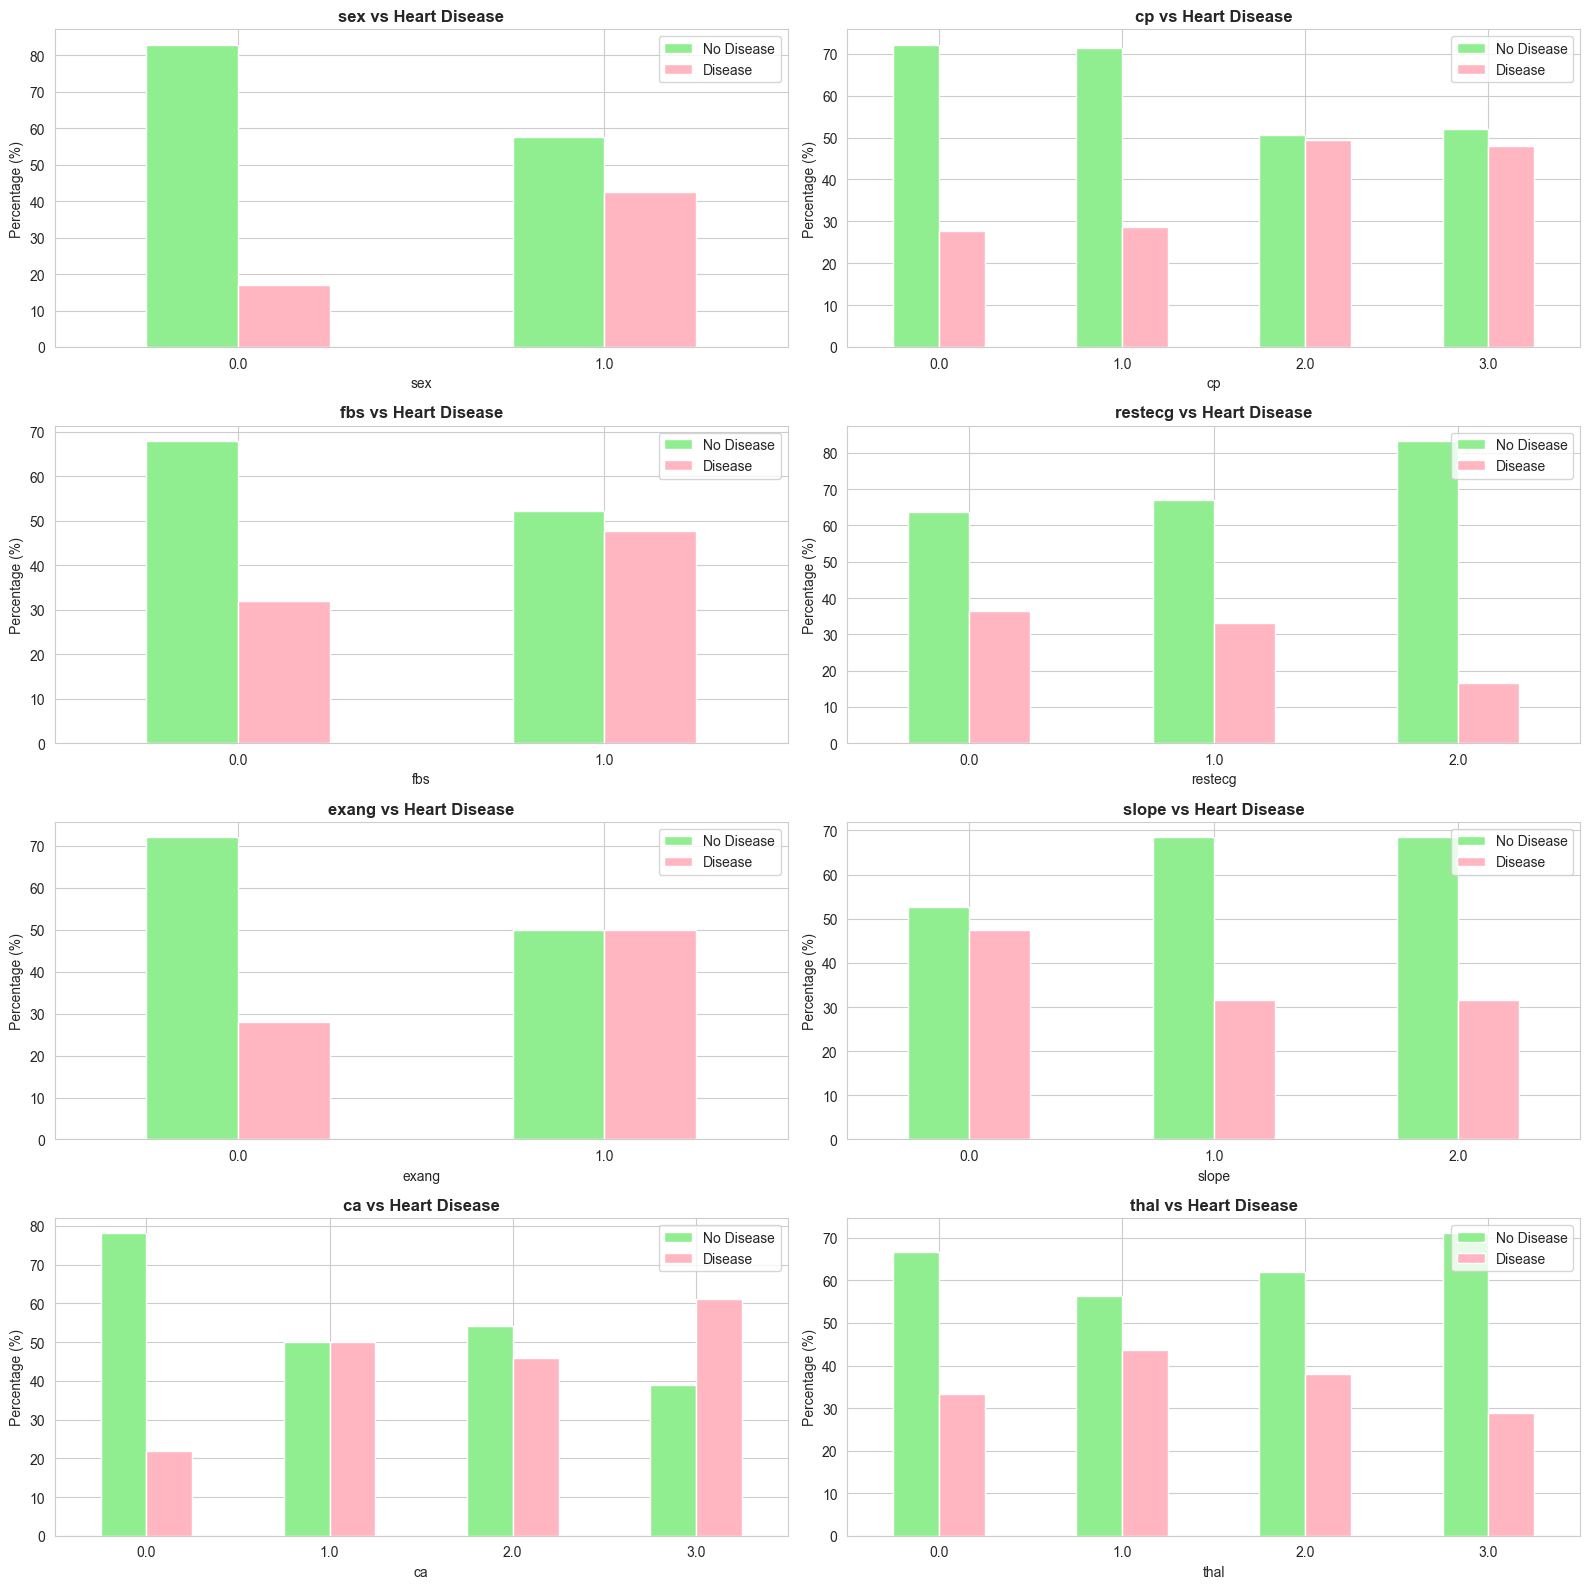

In [8]:
# Categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Count plots for categorical features
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    # Create cross-tab
    ct = pd.crosstab(df[col], df['target'], normalize='index') * 100
    
    # Stacked bar plot
    ct.plot(kind='bar', stacked=False, ax=axes[idx], color=['#90EE90', '#FFB6C1'])
    axes[idx].set_title(f'{col} vs Heart Disease', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(['No Disease', 'Disease'], loc='upper right')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('../screenshots/categorical_features.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Correlation Analysis

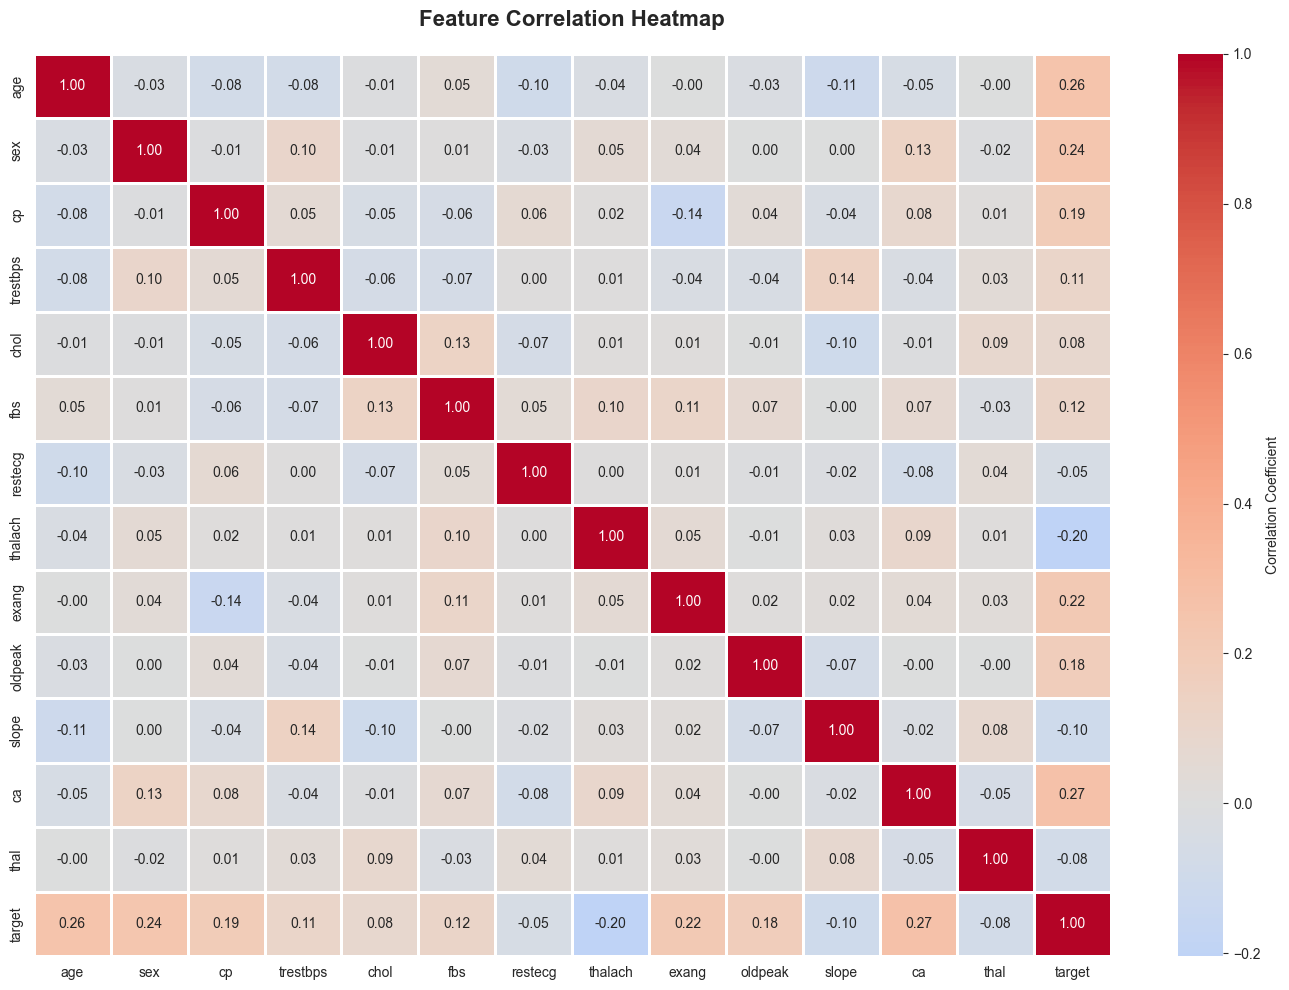


Top 10 Features Correlated with Target:
ca          0.271192
age         0.256347
sex         0.242525
exang       0.215052
cp          0.186981
oldpeak     0.175996
fbs         0.118144
trestbps    0.106024
chol        0.080758
restecg    -0.052372
Name: target, dtype: float64


In [9]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, linewidths=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../screenshots/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with target
target_corr = corr_matrix['target'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with Target:")
print(target_corr[1:11])

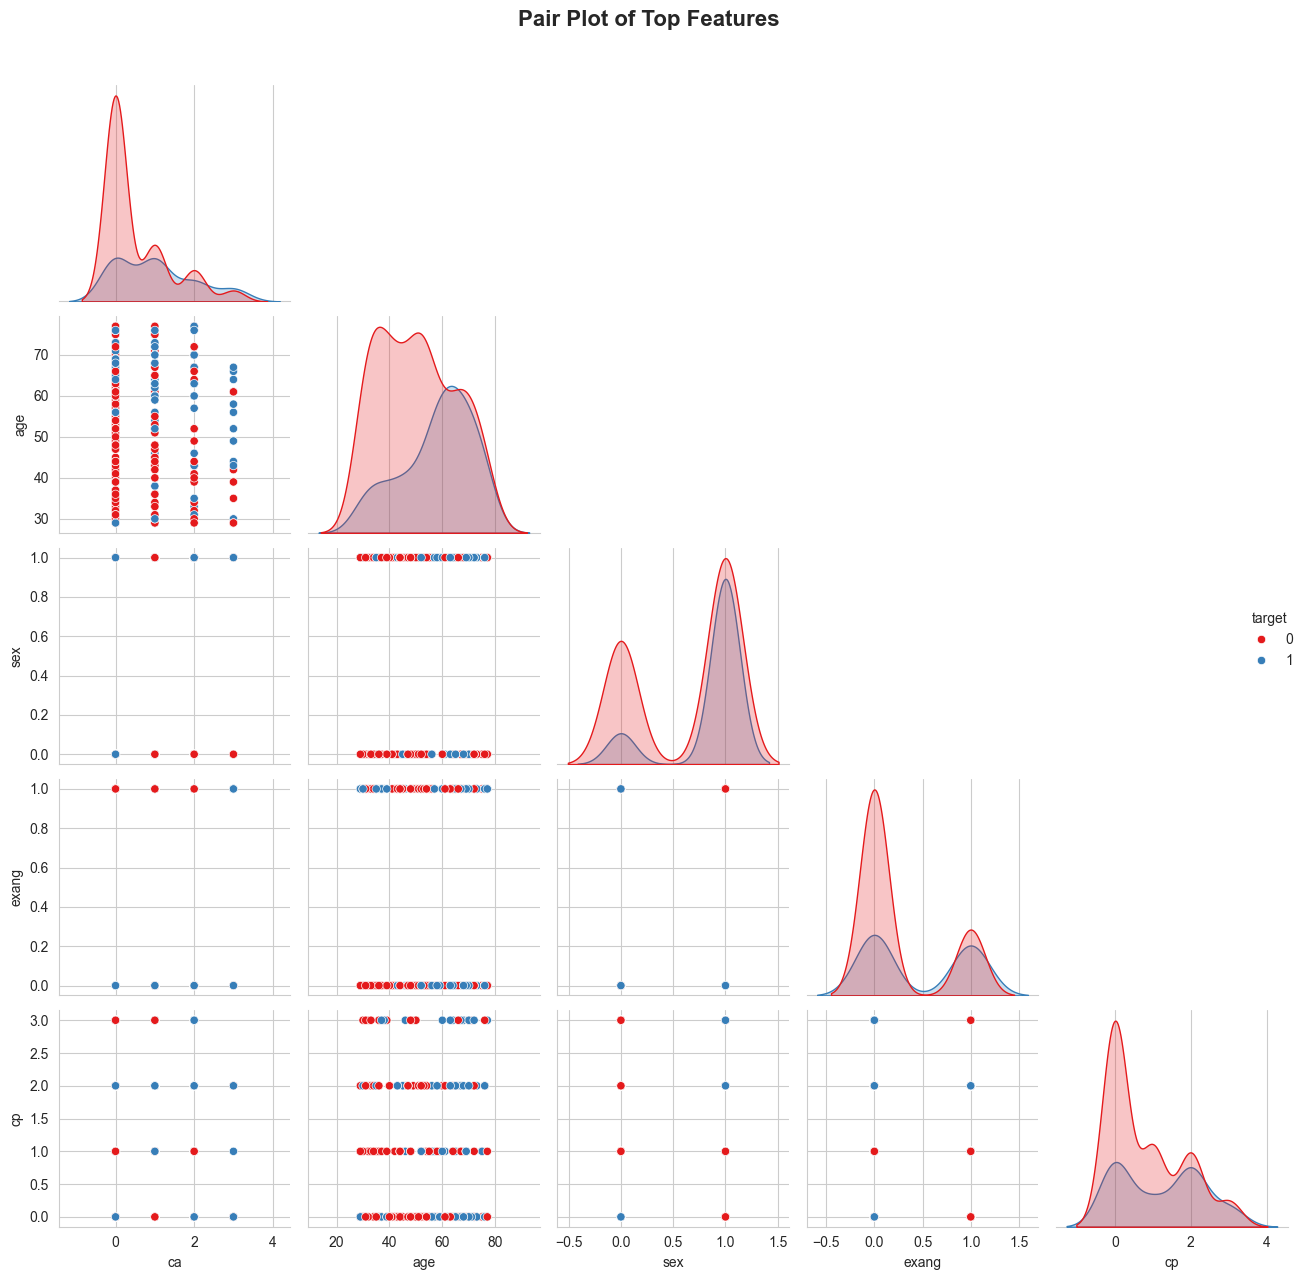

In [10]:
# Scatter plot matrix for top features
top_features = target_corr[1:6].index.tolist() + ['target']
sns.pairplot(df[top_features], hue='target', palette='Set1', diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Top Features', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../screenshots/pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Statistical Tests

In [11]:
# T-tests for numerical features
print("T-test Results (Disease vs No Disease):\n")
print(f"{'Feature':<15} {'T-Statistic':>12} {'P-Value':>12} {'Significant':>12}")
print("="*55)

for col in numerical_features:
    # Remove NaN values
    no_disease = df[df['target'] == 0][col].dropna()
    disease = df[df['target'] == 1][col].dropna()
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(no_disease, disease)
    significant = 'Yes' if p_value < 0.05 else 'No'
    
    print(f"{col:<15} {t_stat:>12.4f} {p_value:>12.6f} {significant:>12}")

T-test Results (Disease vs No Disease):

Feature          T-Statistic      P-Value  Significant
age                  -4.5551     0.000008          Yes
trestbps             -1.8220     0.069475           No
chol                 -1.3916     0.165090           No
thalach               3.5828     0.000398          Yes
oldpeak              -3.0967     0.002142          Yes


## 8. Key Insights

### Summary of EDA Findings:

1. **Dataset Overview**:
   - Total samples: 303
   - Features: 13 (mix of numerical and categorical)
   - Target: Binary classification (heart disease presence/absence)

2. **Class Balance**:
   - Moderate class imbalance (consider using stratified sampling)

3. **Missing Data**:
   - Small percentage of missing values
   - Can be handled with median/mode imputation

4. **Feature Insights**:
   - Age, chest pain type, and max heart rate show strong correlation with target
   - Males have higher disease prevalence
   - Specific chest pain types are more indicative of disease

5. **Recommendations**:
   - Feature engineering opportunities: age groups, risk scores
   - Consider ensemble methods due to feature interactions
   - Use cross-validation for robust evaluation

In [12]:
print("\n✓ EDA Complete! All visualizations saved to ../screenshots/")


✓ EDA Complete! All visualizations saved to ../screenshots/
